VII Auswertung mit Python
==

VII.1
==

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Konstanten
e = 1.6022e-19 # C
c = 3e8 # m s^-2
d = 201.4e-12 # m

Kurzwelliges Ende des LiF Spektrums
---

In [2]:
# Werte
deg = np.loadtxt('data/V255LiF3-22.txt', dtype=str, usecols=[0])
deg = np.char.replace(deg, ',', '.').astype(float)

n = np.loadtxt('data/V255LiF3-22.txt', dtype=str, usecols=[1])
n = np.char.replace(n, ',', '.').astype(float)
sig_n = np.sqrt(n)

# Define fit
def line(x, a, b):
    return a * x + b


# Fit
popt, pcov = curve_fit(line, deg[10:15], n[10:15], sigma=sig_n[10:15])

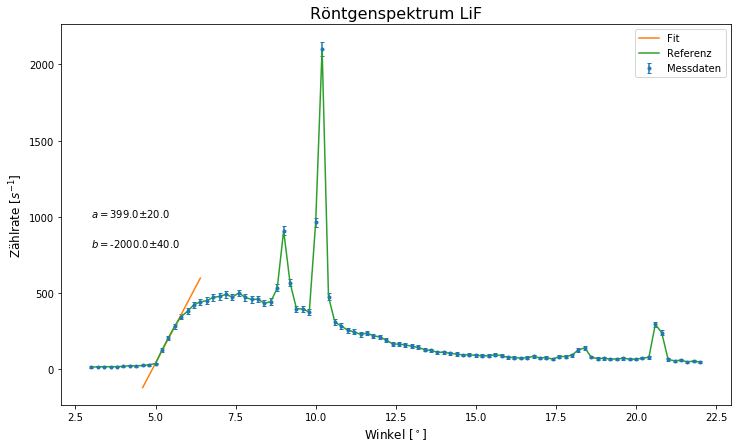

In [3]:
# Plot
plt.figure(figsize = (12,7))
plt.errorbar(deg, n, yerr = sig_n, fmt='.', label = 'Messdaten', capsize = 2)
plt.plot(deg[8:18], line(deg[8:18],*popt), label = 'Fit')
plt.plot(deg, n, label = 'Referenz')
plt.title('Röntgenspektrum LiF', size = 16)
plt.xlabel('Winkel' + ' [$^\circ$]', size = 12)
plt.ylabel('Zählrate' + ' $[s^{-1}]$', size = 12)
plt.text(3, 1000, '$a = $' + str(np.round(popt[0],0)) + '$\pm$' + str(np.round(np.sqrt(popt[0]),0)))
plt.text(3, 800, '$b = $' + str(np.round(popt[1],-3)) + '$\pm$' + str(np.round(np.sqrt(-popt[1]),-1)))
plt.legend(loc = 'upper right')
plt.savefig('images/V255Diagramm1.png')
plt.show()

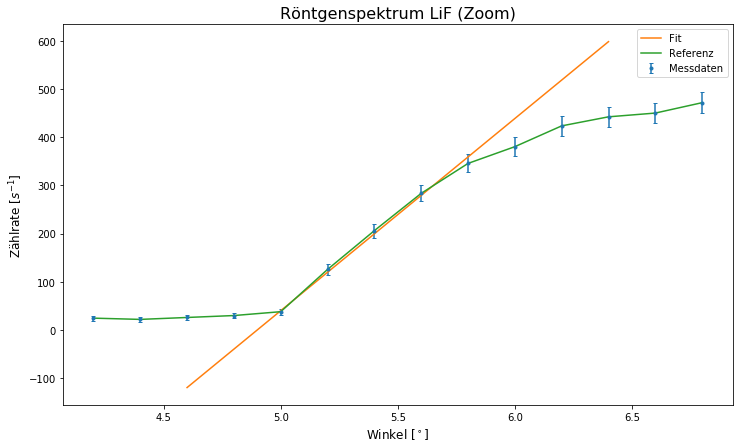

In [4]:
# Plot
plt.figure(figsize = (12,7))
plt.errorbar(deg[6:20], n[6:20], yerr = sig_n[6:20], fmt='.', label = 'Messdaten', capsize = 2)
plt.plot(deg[8:18], line(deg[8:18],*popt), label = 'Fit')
plt.plot(deg[6:20], n[6:20], label = 'Referenz')
plt.title('Röntgenspektrum LiF (Zoom)', size = 16)
plt.xlabel('Winkel' + ' [$^\circ$]', size = 12)
plt.ylabel('Zählrate' + ' $[s^{-1}]$', size = 12)
plt.legend(loc = 'upper right')
plt.savefig('images/V255Diagramm1b.png')
plt.show()

Peaks
---

In [5]:
# Werte 1. Ordnung
deg_2 = np.loadtxt('data/V255LiF8-11.txt', dtype=str, usecols=[0])
deg_2 = np.char.replace(deg_2, ',', '.').astype(float)

n_2 = np.loadtxt('data/V255LiF8-11.txt', dtype=str, usecols=[1])
n_2 = np.char.replace(n_2, ',', '.').astype(float)
sig_n_2 = np.sqrt(n_2)

1. Ordnung

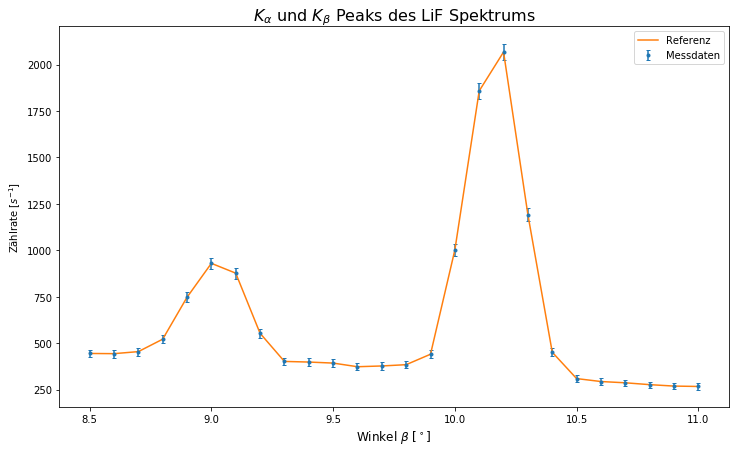


n_max_alpha =  2067.55 
deg_max_alpha =  10.2

n_max_beta =  930.05 
deg_max_beta =  9.0

l_alpha =  7.132973340072815e-11
l_beta =  6.301180251820499e-11


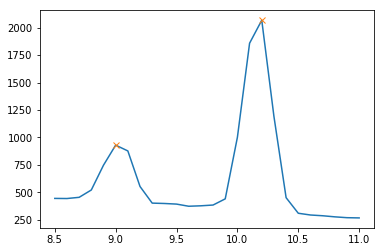

In [6]:
# Plot
plt.figure(figsize = (12,7))
plt.errorbar(deg_2, n_2, yerr = sig_n_2, fmt='.', label = 'Messdaten', capsize = 2)
plt.plot(deg_2, n_2, label = 'Referenz')
plt.title('$K_\\alpha$' + ' und ' + '$K_\\beta$' + ' Peaks des LiF Spektrums', size = 16)
plt.xlabel('Winkel $\\beta$ [$^\circ$]', size = 12)
plt.ylabel('Zählrate [$s^{-1}$]')
plt.legend(loc = 'upper right')
plt.savefig('images/V255Diagramm2.png')
plt.show()


# Lokale Maxima
peaks, _ = find_peaks(n_2, height=250)

n_max_alpha = n_2[peaks[1]] 
deg_max_alpha = deg_2[peaks[1]]
n_max_beta = n_2[peaks[0]]
deg_max_beta = deg_2[peaks[0]]

print('\nn_max_alpha = ', n_max_alpha, '\ndeg_max_alpha = ', deg_max_alpha)
print('\nn_max_beta = ', n_max_beta, '\ndeg_max_beta = ', deg_max_beta)    

# Wellenlängen
def wlange(deg, d, n):
    return 2 / n * d * np.sin(np.deg2rad(deg))


l_alpha = wlange(deg_max_alpha, d, 1) # d in 10^-12 m
l_beta = wlange(deg_max_beta, d, 1) # d in 10^-12 m

print('\nl_alpha = ', l_alpha)
print('l_beta = ', l_beta)

#Sanity check
plt.plot(deg_2, n_2)
plt.plot(deg_2[peaks], n_2[peaks], 'x')
plt.show()

2. Ordnung

In [7]:
# Werte 2. Ordnung
deg_3 = np.loadtxt('data/V255LiF17-22.txt', dtype=str, usecols=[0])
deg_3 = np.char.replace(deg_3, ',', '.').astype(float)

n_3 = np.loadtxt('data/V255LiF17-22.txt', dtype=str, usecols=[1])
n_3 = np.char.replace(n_3, ',', '.').astype(float)
sig_n_3 = np.sqrt(n_3)

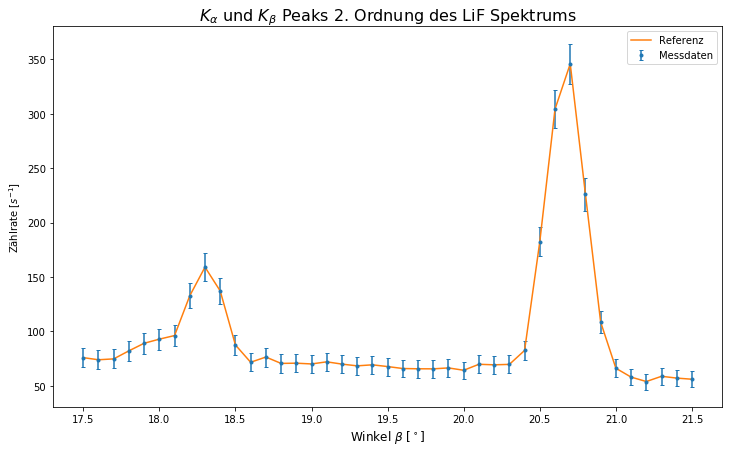


n_max_alpha_2 =  345.95 
deg_max_alpha_2 =  20.7

n_max_beta_2 =  159.05 
deg_max_beta_2 =  18.3

l_alpha_2 =  7.118983353714239e-11
l_beta_2 =  6.323808063183535e-11


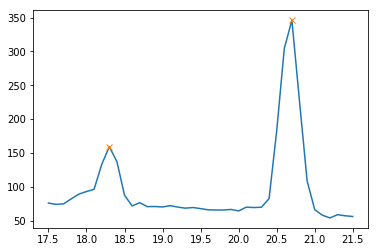

Durchschnitt:

Mo_l_alpha =  7.125978346893526e-11
Mo_l_beta =  6.312494157502017e-11


In [8]:
# Plot
plt.figure(figsize = (12,7))
plt.errorbar(deg_3, n_3, yerr = sig_n_3, fmt='.', label = 'Messdaten', capsize = 2)
plt.plot(deg_3, n_3, label = 'Referenz')
plt.title('$K_\\alpha$' + ' und ' + '$K_\\beta$' + ' Peaks 2. Ordnung des LiF Spektrums', size = 16)
plt.xlabel('Winkel $\\beta$ [$^\circ$]', size = 12)
plt.ylabel('Zählrate [$s^{-1}$]')
plt.legend(loc = 'upper right')
plt.savefig('images/V255Diagramm3.png')
plt.show()

# Lokale Maxima
peaks, _ = find_peaks(n_3, height=100)

n_max_alpha_2 = n_3[peaks[1]]
deg_max_alpha_2 = deg_3[peaks[1]]
n_max_beta_2 = n_3[peaks[0]]
deg_max_beta_2 = deg_3[peaks[0]]

print('\nn_max_alpha_2 = ', n_max_alpha_2, '\ndeg_max_alpha_2 = ', deg_max_alpha_2)
print('\nn_max_beta_2 = ', n_max_beta_2, '\ndeg_max_beta_2 = ', deg_max_beta_2)    
        
l_alpha_2 = wlange(deg_max_alpha_2, d, 2) # d in 10^-12 m
l_beta_2 = wlange(deg_max_beta_2, d, 2) # d in 10^-12 m

print('\nl_alpha_2 = ', l_alpha_2)
print('l_beta_2 = ', l_beta_2)

# Sanity check
plt.plot(deg_3, n_3)
plt.plot(deg_3[peaks], n_3[peaks], 'x')
plt.show()

# Durchschnitt
Mo_l_alpha = (l_alpha + l_alpha_2) / 2
Mo_l_beta = (l_beta + l_beta_2) / 2

print('Durchschnitt:\n')
print('Mo_l_alpha = ', Mo_l_alpha)
print('Mo_l_beta = ', Mo_l_beta)

Halbwertsbreite

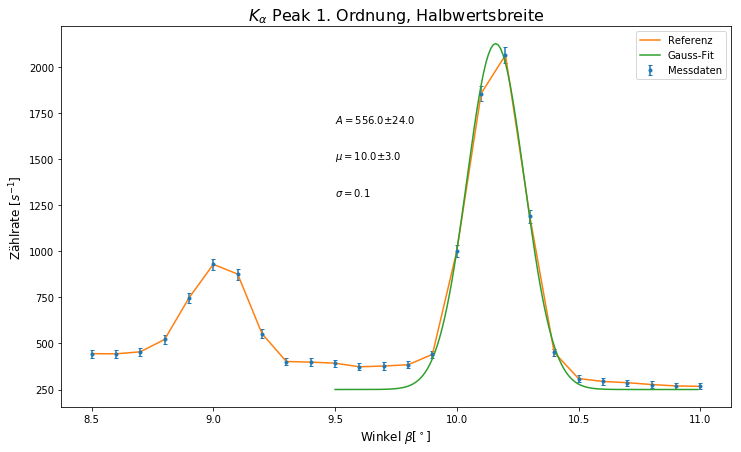

Winkel beta_1/2 =  10.159666873946383
Winkel beta_halb1 =  10.02061545650315
Winkel beta_halb2 = 10.298718291389617
Halbwertsbreite = 1.92445667493146e-12


In [9]:
# Halbwertsbreite 1. Ordnung
from numpy import exp, pi, sqrt


def gauss(x, A, mu, sig):
    return A / (sqrt(2 * pi) * sig) * exp(- (x - mu) ** 2 / (2 * sig ** 2)) + 250


p0 = [500, 10, 0.4]
popt, pcov = curve_fit(gauss, deg_2[14:-4], n_2[14:-4], p0, sigma = sig_n_2[14:-4])

degx = np.arange(9.5,11, 0.01)

plt.figure(figsize = (12,7))
plt.title('$K_\\alpha$ Peak 1. Ordnung, Halbwertsbreite', size = 16)
plt.xlabel('Winkel $\\beta [^\circ]$', size = 12)
plt.ylabel('Zählrate [$s^{-1}$]', size = 12)
plt.errorbar(deg_2, n_2, yerr = sig_n_2, label = 'Messdaten', fmt = '.', capsize = 2)
plt.plot(deg_2, n_2, label = 'Referenz')
plt.plot(degx, gauss(degx, *popt), label = 'Gauss-Fit')
plt.text(9.5, 1700, '$A =$' + str(np.round(popt[0],0)) + '$\pm$' + str(np.round(np.sqrt(popt[0]),0)))
plt.text(9.5, 1500, '$\\mu =$' + str(np.round(popt[1],0)) + '$\pm$' + str(np.round(np.sqrt(popt[1]),0)))
plt.text(9.5, 1300, '$\\sigma =$' + str(np.round(popt[2],1)))
plt.legend(loc = 'best')
plt.savefig('images/V255Diagramm5.png')
plt.show()

y = gauss(degx, *popt)
beta_halb1 = popt[1] -  np.sqrt(2 * np.log(2)) * popt[2]
beta_halb2 = popt[1] +  np.sqrt(2 * np.log(2)) * popt[2]
print('Winkel beta_1/2 = ', popt[1])
print('Winkel beta_halb1 = ', beta_halb1)
print('Winkel beta_halb2 =', beta_halb2)

lambda_halb1 = wlange(beta_halb1, d, 1)
lambda_halb2 = wlange(beta_halb2, d, 1)
print('Halbwertsbreite =', np.abs(lambda_halb2 - lambda_halb1))

Einsatzspannung
--

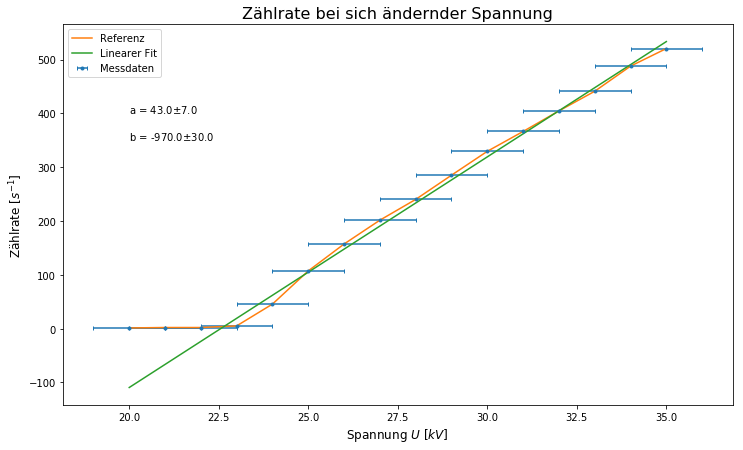

Einsatzspannung U_E = 22.56
Planck-Konstante h = 6.334636496426238e-37


In [10]:
# Werte Tabelle 
U = np.arange(20, 36, 1)
dU = np.ones(16)
n_U = np.array([1.2, 2.0, 2.0, 5.0, 45.55, 107.2, 157.2, 201.5, 240.1, 285.1, 329.5, 366.4, 404.6, 441.1, 487.8, 520.5])


# Fit
popt, pcov = curve_fit(line, U[3:], n_U[3:])
x = np.arange(20, 36, 1)


# Plot
plt.figure(figsize = (12, 7))
plt.title('Zählrate bei sich ändernder Spannung', size = 16)
plt.xlabel('Spannung $U$ [$kV$]', size = 12)
plt.ylabel('Zählrate [$s^{-1}$]', size = 12)
plt.errorbar(U, n_U, xerr = dU, label = 'Messdaten', fmt = '.', capsize = 2)
plt.plot(U, n_U, label = 'Referenz')
plt.plot(x, line(x, *popt), label = 'Linearer Fit')
plt.text(20, 400, 'a = ' + str(np.round(popt[0],0)) + '$\pm$' + str(np.round(sqrt(popt[0]),0)))
plt.text(20, 350, 'b = ' + str(np.round(popt[1],-1)) + '$\pm$' + str(np.round(sqrt(-popt[1]),-1)))
plt.legend(loc = 'best')
plt.savefig('images/V255Diagramm4.png')
plt.show()


# Einsatzspannung
val = np.arange(0, 100, 0.01)
for i in range(0, 10000):
    if line(val[i], *popt) > 0:
        U_E = val[i] #kV
        break
        
print('Einsatzspannung U_E =', U_E)


# Planck Konstante
h = (wlange(7.5, d, 1)) * e * U_E / c
print('Planck-Konstante h =', h)

Röntgenspektrum am NaCl Kristall
---

In [11]:
# Werte 2. Ordnung
deg = np.loadtxt('data/V255NaCl3-18.txt', dtype=str, usecols=[0])
deg = np.char.replace(deg, ',', '.').astype(float)

n = np.loadtxt('data/V255NaCl3-18.txt', dtype=str, usecols=[1])
n = np.char.replace(n, ',', '.').astype(float)
sig_n = np.sqrt(n)

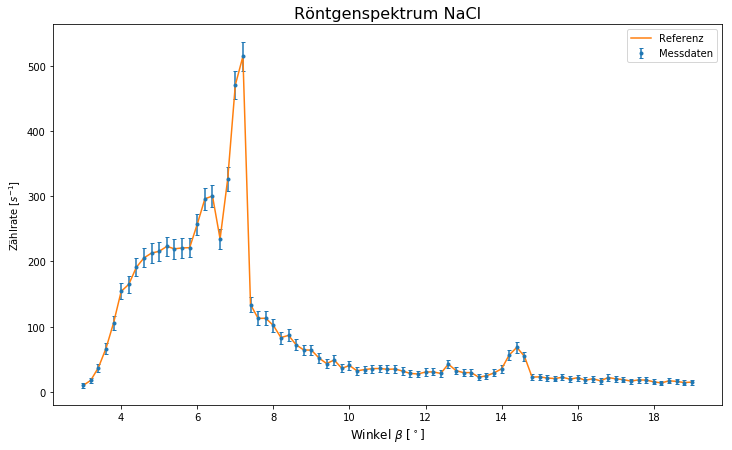


n_max_alpha =  514.2 
deg_max_alpha =  7.2

n_max_beta =  300.2 
deg_max_beta =  6.4


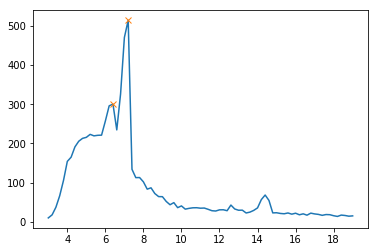

In [12]:
# Plot
plt.figure(figsize = (12,7))
plt.errorbar(deg, n, yerr = sig_n, fmt='.', label = 'Messdaten', capsize = 2)
plt.plot(deg, n, label = 'Referenz')
plt.title('Röntgenspektrum NaCl', size = 16)
plt.xlabel('Winkel $\\beta$ [$^\circ$]', size = 12)
plt.ylabel('Zählrate [$s^{-1}$]')
plt.legend(loc = 'upper right')
plt.savefig('images/V255Diagramm6.png')
plt.show()

# Lokale Maxima 1. Ordnung
peaks, _ = find_peaks(n, height=250)

n_max_alpha = n[peaks[1]]
deg_max_alpha = deg[peaks[1]]
n_max_beta = n[peaks[0]]
deg_max_beta = deg[peaks[0]]

print('\nn_max_alpha = ', n_max_alpha, '\ndeg_max_alpha = ', deg_max_alpha)
print('\nn_max_beta = ', n_max_beta, '\ndeg_max_beta = ', deg_max_beta)    

#Sanity check
plt.plot(deg,n)
plt.plot(deg[peaks], n[peaks], 'x')
plt.show()


n_max_alpha_2 =  68.2 
deg_max_alpha_2 =  14.4

n_max_beta_2 =  42.6 
deg_max_beta_2 =  12.6


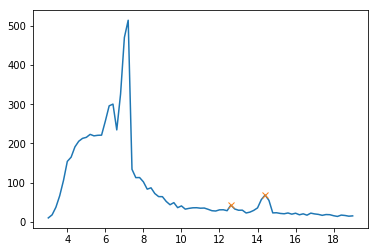

In [13]:
# Lokale Maxima 2. Ordnung
deg_2 = deg[45:]
n_2 = n[45:]
peaks, _ = find_peaks(n_2, height=35)

n_max_alpha_2 = n_2[peaks[1]]
deg_max_alpha_2 = deg_2[peaks[1]]
n_max_beta_2 = n_2[peaks[0]]
deg_max_beta_2 = deg_2[peaks[0]]

print('\nn_max_alpha_2 = ', n_max_alpha_2, '\ndeg_max_alpha_2 = ', 
      deg_max_alpha_2)
print('\nn_max_beta_2 = ', n_max_beta_2, '\ndeg_max_beta_2 = ', 
      deg_max_beta_2)    


#Sanity check
plt.plot(deg, n)
plt.plot(deg_2[peaks], n_2[peaks], 'x')
plt.show()

In [16]:
# Gitterkonstanten
def gitterkonst(deg, l_peak, n):
    return n * l_peak / (np.sin(np.deg2rad(deg)))


da1 = gitterkonst(deg_max_alpha, Mo_l_alpha, 1)
db1 = gitterkonst(deg_max_beta, Mo_l_beta, 1)
da2 = gitterkonst(deg_max_alpha_2, Mo_l_alpha, 2)
db2 = gitterkonst(deg_max_beta_2, Mo_l_beta, 2)
dlist = np.array([da1, db1, da2, db2])

dg = np.mean(dlist)
sig_dg = np.std(dlist)

print('Mittelwert der Gitterkonstante: dg = ' + str(dg))
print('Fehler des Mittelwerts: sig_dg = ' + str(sig_dg))

Mittelwert der Gitterkonstante: dg = 5.716731048233624e-10
Fehler des Mittelwerts: sig_dg = 4.7584113304708365e-12


In [15]:
# Avogadro Konstante
Mmol = 58.44 # g mol^-1
rho = 2.164 # g cm^-3

NA = 4 * Mmol / (rho * dg ** 3)
print(NA)

5.7818878044529996e+29
